<a href="https://colab.research.google.com/github/Whole-Brain/data-science-utils/blob/master/TextTP/TP_Text_IA_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINING OF MASSIVE DATASETS : k-NEAREST NEIGHBOR, DECISION TREES**
**IA SCHOOL**

# I - k-Nearest Neighbor

1. **Collecte de document**

On commence par importer pandas afin de lire le fichier CSV. Cette étape n'est pas obligatoire si vous utilisez des listes de texte ou d'autre méthode pour lire des fichiers texte.

In [0]:
import pandas as pd

Grâce à cela, on peut lire directement notre fichier csv (pré-formaté par nos soins) via pandas qui nous le transforme en object DataFrame :

In [0]:
my_path = "drive/My Drive/Colab Notebooks/TP Text/"
df = pd.read_csv(my_path+"apple_text.csv", sep=":::")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Voici à quoi il ressemble : il n'y a que 19 observations, mais nous nous sommes assurés que toutes ont au minimum une fois le mot "apple".

In [0]:
df.head(20)

,text,type
0,"The apple is a deciduous tree, generally stand...",fruit
1,Commercially popular apple cultivars are soft ...,fruit
2,"Commercially, apples can be stored for some mo...",fruit
3,Apples are obtained from medium-sized tree bel...,fruit
4,One place where the ubiquitous apple does not ...,fruit
5,Pollination also depends on having blossom to ...,fruit
6,Temperatures at blossom time are also very sig...,fruit
7,Plants absorb arsenic from the soil in varying...,fruit
8,Apples are brimming with symbolic meanings and...,fruit
9,Apples play an important part in several Greek...,fruit


Il y a donc deux variables : la variable "text" qui contient des paragraphes de texte, et la variable "type" qui informe du type d'apple dont il est question : fruit ou product.
On ne s'inquiète pas du fait que les observations sont regroupées par types.

2. **Séparation des échantillons**

Maintenant, on doit transformer nos données en quelque chose que notre futur algorithme pourra comprendre.
Pour cela, on utilise un CountVectorizer, que nous devons importer avant tout.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

Le CountVectorizer procède ainsi :
1.   Si l'argument stop_words est renseigné, il va comprendre qu'il devra supprimer tous les mots "inutiles" et tous les caractères. 
En anglais, ce sera par exemple : in, for, a, the, if...
2.   Lors du fit, il va compter tous les mots qui restent, par observation (par ligne). On peut imaginer que la grande majorité des mots auront 0 occurence sur toutes les lignes sauf une.
3. Lors du transform, il renvoie le texte sous forme de vecteur (liste). C'est à ce point-là que le lien entre l'index du mot et le mot est perdu, seul count_vect le connait. Pour ceux que ça intéresse, il s'agit de l'attribut vocabulary_ (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)


In [0]:
count_vect = CountVectorizer(stop_words="english")
vectorized_data = count_vect.fit_transform(df.text)

Nos datas sont presque prêtes, il nous reste encore à les séparer en deux échantillons : 2/3 train et 1/3 test.
Cette procédure est à connaître absolument.
Tout d'abord, il faut import la fonction.

In [0]:
from sklearn.model_selection import train_test_split

La fonction train_test_split fonctionne ainsi.
Elle a besoin de 2 arguments minimum :
1. La data (sans les réponses)
2. Les réponses
3. La portion de l'ensemble que nous gardons comme test (par défaut si non renseigné : 0.25)

Le but est de pouvoir entraîner notre modèle par la suite avec l'échantillon train, puis le tester avec des données qu'il n'a jamais vu : l'échantillon test.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, df.type, test_size = 1/3)

Etant donné que l'algorithme que nous allons utiliser a besoin d'arrays (et pas de vecteurs), il faut les convertir :

In [0]:
X_train = X_train.toarray()
X_test = X_test.toarray()

3. **Le Machine Learning**

Maintenant on importe l'algorithme en question : KNeighborsClassifier.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

On l'instancie. Le paramètre que j'ai choisi de modifier ici est n_neighbors. Rien ne vous empêche d'essayer tous les paramètres que vous voulez. Comme d'hab, il faut lire la doc qui est très complète et lisible : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
Puis on l'entraîne (fit) avec les données d'entrainement.
Fit est une méthode récurrente dans tous les algos de ML, elle a toujours besoin de deux arguments : la donnée et les réponses (avec len(donnée) = len(réponses) !)

In [0]:
neigh = KNeighborsClassifier(n_neighbors = 6)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Comme on peut le voir, nos observations (rappel : séparées par mot puis transformées en nombre d'occurence) ont bien la même longueur.
Et comme on a mis test_size = 1/3, on a bien 1/3 de test et 2/3 de train.


In [0]:
print("X_train shape = ", X_train.shape)
print("X_text shape = ", X_test.shape)

X_train shape =  (12, 521)
X_text shape =  (7, 521)


4. **Prédiction**

Maintenant, on peut demander à notre algo de prédire les réponses pour nos données de test. On les stock dans une variable, pour plus tard faire des études dessus (ex: plusieurs fonctions d'erreurs, ou par curiosité pour savoir quelles réponses il a donné à quoi, avec un peu de bidouillage).

In [0]:
y_pred = neigh.predict(X_test)

Mais si on veut juste connaître sa précision, on appelle juste la méthode score (qui prend la donnée et ses réponses en arguments).
Ici : je l'ai fait deux fois : une fois sur les échantillons train, et une fois sur l'échantillon test.

In [0]:
print("Score sur le train : ", neigh.score(X_train, y_train))
print("Score sur le test : ", neigh.score(X_test, y_test))

Score sur le train :  0.75
Score sur le test :  0.2857142857142857


(C'est très nul !)

Pourquoi faire des scores sur les train aussi ? Pour une raison :
si le score train est très supérieur au score test, ça s'appelle de l'"overfitting" ; ça veut dire que votre algo connait trop bien ses données d'entrainement et ne sera pas assez souple pour précisément deviner des données qu'il ne connaît pas déjà (l'échantillon test).
Ca peut-être utile quand on connait bien l'algo car ça indique dans quel sens tweeker ses paramètres.

5. **La suite ?**

1. Tester les autres algos dans le PDF de la prof.
2. Comprendre l'autre méthode de séparation des échantillons : CrossValidation
3. (Avancée) Essayer de trouver les paramètres optimaux grâce au GridSearchCV qui permet de tester toutes les combinaisons de paramètres grâce aux valeurs qu'on lui renseigne sous cette forme : 



```
gdcv = GridSearchCV(estimator = neigh, param_grid= { "n_neighbors" : (2, 3, 5,10), "algorithm" : ("auto","ball_tree","kd_tree"), "leaf_size": (5, 15, 30 , 50) } ) 
# voir les différents paramètres qu'on peut tuner sur le site de sklearn et la page de votre algo
# ici : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
gdcv.fit(...etc...)
```



# II - Arbre décisionnel

### Premier essai

Afin de lire les données fournies, nous nécessitons numpy que nous importons.

In [0]:
import numpy as np

Nos données sont déjà séparées en 4 : les données d'entrées pour l'entrainement et le test, et les labels (les réponses attendues) pour l'entrainement et le test.

In [0]:
tree_data_path = my_path+"TextTP/DecisionTreeData/"
training_data = np.load(tree_data_path+'training_data.npy')
training_class = np.load(tree_data_path+'training_class.npy')
test_data = np.load(tree_data_path+'test_data.npy')
test_class = np.load(tree_data_path+'test_class.npy')

Nous utiliserons un autre type d'algorithme que SciKitLearn implémente également : les arbres décisionnels. Nous importons donc le modèle que nous allons utiliser et qui se trouve dans le module tree : le DecisionTreeClassifier.

In [0]:
from sklearn.tree import DecisionTreeClassifier

Nous instancions un arbre, avec les paramètres demandés dans l'exercice.
Puis nous entraînons cet arbre avec nos échantillons d'entrainement.
Comme d'habitude, on utilise la méthode "fit" qui prend deux arguments : les données d'entrée et les réponses.

In [0]:
clf = DecisionTreeClassifier(criterion='gini', random_state=np.random.RandomState(130))
clf = clf.fit(training_data, training_class)

Maintenant que notre arbre est entraîné, nous pouvons lui demander des prévision sur des données qu'il ne connait pas : l'échantillons test. Nous gardons ses réponses dans une variable que nous appelons "test_pred".

In [0]:
test_pred = clf.predict(test_data)

Comme expliqué dans la Partie 1, nous allons également demander les prédictions de notre arbre sur les données d'entraînement afin de savoir si notre modèle "overfit".
Cette procédure est d'autant plus importante que, du fait de leur principe de fonctionnement, l'overfitting est très courant avec les arbres décisionnels.

In [0]:
train_pred = clf.predict(training_data)

Afin de connaître les scores de notre arbre, il nous faut un autre type de calcul que nous pouvons importer du module metrics de SciKitLearn : accuracy_score.

In [0]:
from sklearn.metrics import accuracy_score

Voyons les scores de notre arbre sur les réponses précédemment récupérées.

In [0]:
print("Accuracy on train =", accuracy_score(training_class, train_pred))
print("Accuracy on test = ", accuracy_score(test_class, test_pred))

Accuracy on train = 1.0
Accuracy on test =  0.54


Nous remarquons une mauvaise précision sur l'échantillon de test alors que la précision est maximale sur l'échantillon d'entraînement ; il s'agit d'un cas évident d'overtfitting.

Plutôt que de générer un fichier PDF, nous pouvons afficher directement notre arbre sur le présent notebook, grâce au module graphviz, que nous importons.

In [0]:
from sklearn.tree import export_graphviz
import graphviz

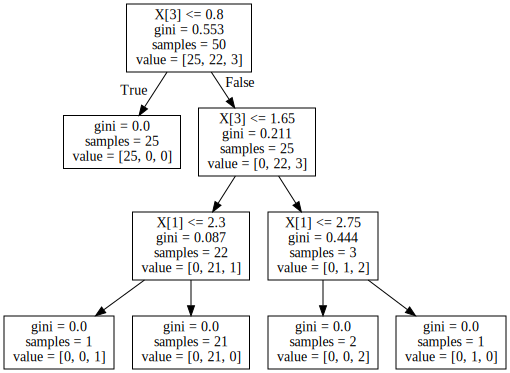

In [0]:
display(graphviz.Source(export_graphviz(clf)))

Nous voyons des informations intéressantes : chaque cadre est une "branche" de notre arbre. Chaque branche correspond à une question binaire (en True ou False). 
ex : X[1] <= 165.

Nous voyons également combien d'observations donnent chaque réponse, et leur future répartition dans les branches filles. ex: "samples = 25" indique qu'il y a 25 observations questionnées. Puis "value = [0, 22, 3]" indique que parmi ces 25 observations, aucune ne finira dans la catégorie 1, 22 finiront dans la catégorie 2 et 3 dans la catégorie 3.

Les cadres qui n'ont pas d'enfants sont des feuilles et donnent donc la classification pour un certain nombre d'observations de nos données. L'arbre arrête donc de poser des questions lorsque toutes les observations de chaque feuille sont classées dans la même catégorie.

### Optimisation de l'arbre

Une méthode incoutournable en Machine Learning est le GridSearchCV (GSCV). C'est une autre chose à maitrîser.

Le GridSearchCv consiste à essayer toutes les combinaisons de paramètres que nous lui fournissons, sur un modèle que nous lui fournissons également : il s'agira de notre arbre DecisionTreeClassifier.

Après avoir essayer toutes les combinaisons, le GridSearchCV nous informera de la meilleure combinaison de paramètres, c'est-à-dire celle qui démontre le plus grand score de précision sur nos échantillons.

Commençons par l'importer.

In [0]:
from sklearn.model_selection import GridSearchCV

Avant de l'instancier, nous devons réfléchir à quels paramètres de notre arbre nous souhaitons "tuner".

Pour cela, il est utile de faire des recherches spécifiques pour chaque modèle. Voici un exemple de source intéressante : https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

Nous y trouvons l'ensemble des paramètres de notre arbre qu'il est intéressant de tuner, et une idée de l'échelle pour chacun d'eux. Nous y ajouterons le paramètres "splitter".

Pour rappel, tous les paramètres sont décrits dans la documentation officielle (incoutournable !) : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

GridSearchCV fonctionne grâce à un dictionnaire avec :
- les paramètres en tant que clé.
- les valeurs de chaque clé est une liste contenant toutes les valeurs que l'on souhaite tester.

In [0]:
params= {"max_features":np.arange(2,training_data.shape[1]+1),
         "splitter":["best","random"], 
         "min_samples_split":np.arange(2,20), 
         "max_depth":[None]+list(np.arange(2,16)),
         "min_samples_leaf":np.arange(1,20)}

Plusieurs remarques importantes ici.

1.   Numpy met à disposition des fonctions permettant d'obtenir des listes simplement. linspace(i, j, n) donnera une liste de n valeurs espacée de manière régulières, de i à j. logspace fonctionne de manière similaire mais les valeurs et l'espacement se situeront sur une échelle logarithmique. (voir cellule ci-dessous pour des aperçus de ces deux fonctions) 
2.   Il est important de consulter la documentation et de s'assurer de renseigner le bon type de valeurs pour chaque paramètre, qui peuvent être numériques ou catégorielles (sous forme de string ou None).
3. Le nombre total de combinaisons est facile à calculer : c'est le produit de nombre de chaque liste donnée ! On comprend donc que le temps nécessaire à GSCV augmente de manière exponentielle avec le nombre de paramètres et de valeurs renseignés.
4. La méthode de séparation de GridSearchCV n'est pas basé sur un simple test_train_split. Il s'agit ici de cross-validation (par défaut : 5 folds). Nous devrons donc multiplier par 5 pour avoir une idée du nombre totale d'itérations sur notre arbre.

In [0]:
print("Aperçu : linspace(1,10,10) = ", np.linspace(1,10,10))
print("Aperçu : logspace(1,10,10) = ", np.logspace(1,10,10))

Aperçu : linspace(1,10,10) =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Aperçu : logspace(1,10,10) =  [1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


Maintenant que notre dictionnaire de paramètres est prêt, nous instancions GridSearchCV en lui fournissant notre modèle et le dictionnaire de paramètres.

Le paramètre n_jobs permettra, dans un environnement propice (les serveurs gratuits de Colab n'en est pas un) de prendre avantage des processeurs multi-coeurs. -1 signifie qu'il utilisera le maximum de coeurs disponibles (en  simplifié). Cela peut être un gain de temps important, de plusieurs ordres, si vous exécutez le code sur votre propre système.

Le paramètre verbose à la valeur 1 permet de voir la progression du GridSearchCV dans la console.

In [0]:
gscv = GridSearchCV(DecisionTreeClassifier(), param_grid=params,n_jobs=-1, verbose=1)

Comme avec un modèle classique, nous appelons la méthode "fit" de notre instance de GridSearchCV, et nous lui fournissons les données d'entrée et réponses d'entraînement.

Il faudra environ deux minutes pour tester toutes les combinaisons créées dans notre cadre actuel.

In [0]:
gscv.fit(training_data, training_class)

Fitting 5 folds for each of 30780 candidates, totalling 153900 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1288 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 20488 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 52488 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 97288 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 153745 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 153900 out of 153900 | elapsed:  2.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                 

Désormais, nous pouvons récupérer la liste des paramètres optimaux : l'attribut best_params_.

In [0]:
print(gscv.best_params_)

{'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


GridSearchCV est pratique car il garde toutes les informations en mémoire. Nous pouvons voir le résultat pour chaque combinaison grâce à son attribut cv_results_. 

In [0]:
# gscv.cv_results_

De plus, il utilisera cette combinaison optimale de paramètres lors des prédictions ultérieures. Nous n'avons donc pas de nécessité d'entraîner un autre arbre avec ces paramètres et nous pouvons calculer les scores directement grâce à la méthode predict de GridSearchCV.

Comme d'habitude, nous calculons les scores sur les échantillons train et test pour identifier un possible overfitting.

In [0]:
gcv_train_pred = gscv.predict(training_data)
gcv_test_pred = gscv.predict(test_data)
print("Accuracy on train = ", accuracy_score(training_class, gcv_train_pred))
print("Accuracy on test = ", accuracy_score(test_class, gcv_test_pred))

Accuracy on train =  0.92
Accuracy on test =  0.5


Nous avons ici un problème : notre modèle overfit parfois et GridSearchCv identifiera dans ce cas une combinaison de paramètres amenant à un modèle incapable de prédire la réponse sur de nouvelles données. Nous voyons ici les limites de GridSearchCV. 

Nous allons donc adopter une stratégie semblable de combinaison de paramètre mais de manière programmatique. Nous pourrons donc ainsi sélectionner les meilleurs paramètres en fonction des résultats obtenus sur les prédiction de test, et non sur ceux de l'ensemble des échantillons d'entrainement.

ParameterGrid est une classe utile afin de récupérer directement l'ensemble des combinaisons à partir de notre dictionnaire originale.

In [0]:
from sklearn.model_selection import ParameterGrid

In [0]:
param_grid = ParameterGrid(params)

result_list=[]
best_param_index = -1
best_score = 0
# On teste et sauvegarde les résultats train et test de chaque combinaison.
for i,param in enumerate(param_grid):
    if i%int(2*len(param_grid)**0.5) == 0:
        print("Testing parameters",i,"/",len(param_grid)," : ", param)
    clf = DecisionTreeClassifier(criterion='gini',random_state=np.random.RandomState(130),**param)
    clf=clf.fit(training_data, training_class)
    clf_train_pred = clf.predict(training_data)
    clf_test_pred = clf.predict(test_data)
    results = [accuracy_score(training_class, clf_train_pred),
               accuracy_score(test_class, clf_test_pred)]
    result_list.append(results)
    if results[1] > best_score:
        best_score=results[1]
        best_param_index = i

print("\nLes meilleurs paramètres sont : \n\t",param_grid[best_param_index])
print("Accuracy on train = ", result_list[best_param_index][0])
print("Accuracy on test = ", best_score)

Testing parameters 0 / 30780  :  {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Testing parameters 350 / 30780  :  {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 10, 'min_samples_split': 15, 'splitter': 'best'}
Testing parameters 700 / 30780  :  {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Testing parameters 1050 / 30780  :  {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 11, 'min_samples_split': 5, 'splitter': 'best'}
Testing parameters 1400 / 30780  :  {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 18, 'splitter': 'best'}
Testing parameters 1750 / 30780  :  {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 11, 'min_samples_split': 13, 'splitter': 'best'}
Testing parameters 2100 / 30780  :  {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'best'}
Testing

Nous voyons une très bonne précision et aucun overfitting. Notre modèle est satisfaisant et nous avons possiblement trouvé les meilleurs paramètres pour un DecisionTreeClassifier.

In [0]:
finale_clf = DecisionTreeClassifier(criterion='gini',random_state=np.random.RandomState(130),**param_grid[best_param_index])
finale_clf = finale_clf.fit(training_data, training_class)
finale_clf_train_pred = finale_clf.predict(training_data)
finale_clf_test_pred = finale_clf.predict(test_data)

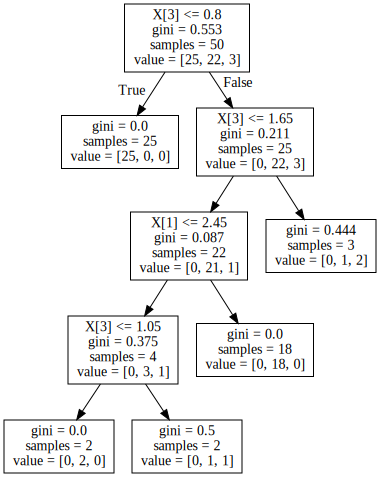

In [0]:
display(graphviz.Source(export_graphviz(finale_clf)))

# III - Naive Bayes Classifier

Le but de cette partie sera de maîtriser la K-fold cross-validation de manière programmatique. Contrairement à ce que nous avons fait dans les parties précédentes, nous allons donc ici programmer nos propres fonctions dans ce but.

La première chose à faire est de récupérer chaque ligne de texte comme une observation. Les quatres catégories target correspondent au fichier d'origine du texte. Il s'agit des quatre fichiers dans le dossier NaiveBayesData.

In [0]:
fruit_text_path = my_path+"TextTP/NaiveBayesData/"

In [0]:
text_files = ["apple_the_company", "apple_the_fruit", "banana", "microsoft"]

pour faire le plus simple possible, nous aurons deux listes, un e liste avec, dans l'ordre, les textes (un texte correspond à une ligne des fichiers texte) et, dans l'autre, la catégorie auxquelles appartiennent nos textes. L'ordre est ainsi maintenu et le lien entre les deux sera fait grâce aux index ; ainsi, le texte à l'index n du fichier texts a la catégorie indiquée (poar un numéro 0 à 3) à l'index n du fichier categories).

In [0]:
data_texts=[]
data_categories = []

Nous pouvons lire dans des fichiers texte grâce à des fonctions inclues dans Python.

In [0]:
for filename in text_files:
    with open(fruit_text_path+filename+".txt","r") as file:
        lines = file.read().splitlines()
        # Ajoute tous les textes sous forme de liste.
        data_texts.extend(lines)
        # La ligne suivante ajoute autant de fois la category 
        # qu'il y a de texte dans le fichier.
        data_categories.extend([text_files.index(filename)]*len(lines))

Les données brutes sont prêtes.

Dans le cadre de cet exercice, nous manipulerons un simple modèle appelé Naive Bayes Classifier. Comme d'habitude, nous devons l'importer.

In [0]:
from sklearn.naive_bayes import MultinomialNB

Comme nous l'avons fait dans la première partie, nous allons transformer les texts grâce à notre CountVectorizer (nous avons toujours l'instance de celui-ci en mémoire). Nous allons également directement transformer les vecteurs obtenus en array.

In [0]:
vect_data_texts = count_vect.fit_transform(data_texts).toarray()

Comme nous le voyons grâce aux informations de leur taille, nos vecteurs et nos réponses ont la même taille : 200.

In [0]:
print(vect_data_texts.shape)
print(len(data_categories))

(200, 3223)
200


Il s'agit désormais de préparer nos données en plusieurs échantillons pour la k-fold cross-validation. Nous allons programmer une fonction pour cela, que nous allons tâcher de rendre adaptable à un nombre de fold quelconque (mais 5 par défaut).

In [0]:
from random import shuffle

def get_index_folds(data, n_fold=5):
    taille = len(data)
    if n_fold>taille:
        raise ValueError("You can't fold %i times : data is length %i"%(n_fold, taille))
    fold_indices = []
    # On mélange la liste d'index.
    shuffled_indices = list(range(taille))
    shuffle(shuffled_indices)
    for i in range(n_fold):
        fold_indices.append((
            shuffled_indices[0:i*(taille//n_fold)]+shuffled_indices[(i+1)*(taille//n_fold):],
            shuffled_indices[i*(taille//n_fold):(i+1)*(taille//n_fold)]
            ))
    return fold_indices

La fonction get_index_folds renvoies n tuples : chaque tuple a pour premier élément un liste d'indice "train" et une liste d'indices "test", sachant que chaque indice apparait au total une fois dans chaque tuple.

In [0]:
folds = get_index_folds(data_texts)

Instancions simplement notre modèle.

In [0]:
mnb = MultinomialNB()

Nous pouvons maintenant entrâiner notre modèle en suivant un k_fold cross-validation, grâce aux folds préparés.

In [0]:
train_results=[]
test_results=[]
for fold in folds:
    mnb = mnb.fit([vect_data_texts[i] for i in fold[0]],
                  [data_categories[i] for i in fold[0]])
    mnb_train = mnb.predict([vect_data_texts[i] for i in fold[0]])
    mnb_pred = mnb.predict([vect_data_texts[i] for i in fold[1]])
    train_result = accuracy_score([data_categories[i] for i in fold[0]], mnb_train)
    test_result = accuracy_score([data_categories[i] for i in fold[1]], mnb_pred)
    print("Précision sur train :", train_result)
    print("Précision sur test :", test_result)
    train_results.append(train_result)
    test_results.append(test_result)
print("\nMoyenne sur le train :", np.mean(train_results))
print("Moyenne sur le test :", np.mean(test_results))

Précision sur train : 1.0
Précision sur test : 0.975
Précision sur train : 1.0
Précision sur test : 0.95
Précision sur train : 1.0
Précision sur test : 1.0
Précision sur train : 1.0
Précision sur test : 1.0
Précision sur train : 1.0
Précision sur test : 0.975

Moyenne sur le train : 1.0
Moyenne sur le test : 0.9799999999999999


Vu les scores obtenus, cela prédit très bien sans démontrer d'overfitting.